In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

ROOT_DIR = 'drive/MyDrive/Study/02.기계학습기초'
CUSTOMER_DIR = os.path.join(ROOT_DIR, 'Customers.csv')
TRANSATION_DIR = os.path.join(ROOT_DIR, 'Transactions.csv')

In [3]:
import pandas as pd

df_customer = pd.read_csv(CUSTOMER_DIR)
df_transaction = pd.read_csv(TRANSATION_DIR)

In [4]:
df_transaction

,sales_date,custid,goodcd,brd_nm,team_nm,part_nm,pc_nm,corner_nm,tot_amt,dis_amt,net_amt
0,2000-05-01 00:00:00,7595,2700000000000,식품,식품팀,공산품,일반식품,주류,28000,0,28000
1,2000-05-01 00:00:00,36860,2700000000000,식품,식품팀,공산품파트,일반식품,차류,59700,0,59700
2,2000-05-01 00:00:00,48385,4125270007985,슈프리미아,잡화가용팀,잡화파트,장신구,화장잡화,17000,0,17000
3,2000-05-01 00:00:00,29611,4508720043900,삼운/브로니,잡화가용팀,가정용품,식기,욕실용품,14000,700,13300
4,2000-05-01 00:00:00,16457,4120441805900,베네통토탈,의류패션팀,영플라자,소품,피혁토탈(B2),5800,290,5510
...,...,...,...,...,...,...,...,...,...,...,...
1726425,2001-04-29 00:00:00,22903,4409270126000,스포트리플레이,의류패션팀,영플라자,진캐주얼,스포츠캐주얼,27300,0,27300
1726426,2001-04-29 00:00:00,32832,6240990026001,쌈지스포츠,잡화가용팀,"아동,스포츠",(주)현스포츠아쌤,미확인코너,144000,7200,136800
1726427,2001-04-29 00:00:00,18628,2700000000000,식품,식품팀,공산품,일반식품,음료,8340,0,8340
1726428,2001-04-29 00:00:00,38077,2700000000000,식품,식품팀,생식품,미확인pc,용기보증,23170,0,23170


RFM.  
R (Recency) : 주문 기간  
F (Frequency) : 주문 횟수  
M (Monetary) : 주문 금액

In [5]:
df_transaction.custid.value_counts().head()

33995    672
32067    589
43915    525
40230    501
26295    491
Name: custid, dtype: int64

In [6]:
# 음수가 존재할 수 없음
df_transaction.groupby('custid').net_amt.sum().sort_values(ascending=False)

custid
47465    114790147
49096    109521205
31370     99096866
49996     96578365
49967     96071830
           ...    
46606      -723354
42888     -1242661
32109     -1500536
2597      -1555150
13008    -10805201
Name: net_amt, Length: 49995, dtype: int64

In [7]:
df_transaction[df_transaction.net_amt < 0]

,sales_date,custid,goodcd,brd_nm,team_nm,part_nm,pc_nm,corner_nm,tot_amt,dis_amt,net_amt
79,2000-05-01 00:00:00,32712,4552430944100,에이스침대,잡화가용팀,가정용품,가구,침대,-1163920,-34920,-1129000
129,2000-05-01 00:00:00,36157,4105200004000,MCM,잡화가용팀,잡화,핸드백,핸드백,-24000,-1200,-22800
139,2000-05-01 00:00:00,23053,4230120011200,스테파넬,의류패션팀,"케주얼,구두,아동",영트렌디,영트랜드,-126000,-6300,-119700
149,2000-05-01 00:00:00,27982,4109160008000,크리스챤디올화장품,잡화가용팀,패션잡화,화장품,수입종합화장품,-38000,-1900,-36100
150,2000-05-01 00:00:00,32627,4405551020470,톰키드,잡화가용팀,아동,아동,아동복,-39000,0,-39000
...,...,...,...,...,...,...,...,...,...,...,...
1726308,2001-04-29 00:00:00,38442,4134870003200,이사벨,의류패션팀,영어덜트캐쥬얼,패션슈즈,캐릭터슈즈,-168000,-8400,-159600
1726328,2001-04-29 00:00:00,15623,4242470011210,올리브데올리브,의류패션팀,"케주얼,구두,아동",영트렌디,영트랜드,-577800,0,-577800
1726356,2001-04-29 00:00:00,46348,4408870029980,휠라행사,잡화가용팀,스포츠캐주얼,스포츠,스포츠단품,-16000,0,-16000
1726378,2001-04-29 00:00:00,10055,4234840010000,랄프로렌,의류패션팀,여성의류파트,여성캐주얼,미시케쥬얼,-207000,-10350,-196650


In [8]:
# 구매금액이 음수인 행에 대한 예외처리
df_transaction.dropna(axis=0, inplace=True)
drop_idx = df_transaction[df_transaction.net_amt < 0].index
df_transaction.drop(index=drop_idx, axis=0, inplace=True)

In [9]:
# Recency
R: pd.DataFrame = pd.DataFrame(df_transaction.groupby('custid').sales_date.max())
R = R.rename(columns={'sales_date': 'R'})
print(R.shape, '\n', R)

(49995, 1) 
                           R
custid                     
1       2001-04-29 00:00:00
2       2001-04-11 00:00:00
3       2001-04-27 00:00:00
4       2001-04-14 00:00:00
5       2001-04-25 00:00:00
...                     ...
49996   2001-04-29 00:00:00
49997   2001-04-27 00:00:00
49998   2001-04-15 00:00:00
49999   2001-04-26 00:00:00
50000   2001-04-12 00:00:00

[49995 rows x 1 columns]


In [10]:
# Frequency
F: pd.DataFrame = pd.DataFrame(df_transaction.groupby('custid').count()[['sales_date']])
F = F.rename(columns={'sales_date': 'F'})
print(F.shape, '\n', F)

(49995, 1) 
           F
custid     
1        76
2        26
3        53
4         6
5         4
...     ...
49996   168
49997    43
49998    36
49999    23
50000    27

[49995 rows x 1 columns]


In [11]:
# Moneytary
M: pd.DataFrame = pd.DataFrame(df_transaction.groupby('custid').net_amt.sum().sort_values(ascending=False))
M = M.rename(columns={'net_amt': 'M'})
print(M.shape, '\n', M)

(49995, 1) 
                 M
custid           
47465   181745697
49732   143645514
49096   110535805
47884   109982712
32532   106221980
...           ...
7956        22800
30903       22800
11218       21600
7606        19000
11158       16100

[49995 rows x 1 columns]


In [12]:
RFM = R.merge(F, on='custid').merge(M, on='custid')
RFM

,R,F,M
custid,,,
1,2001-04-29 00:00:00,76,3950301
2,2001-04-11 00:00:00,26,2320529
3,2001-04-27 00:00:00,53,10275509
4,2001-04-14 00:00:00,6,381300
5,2001-04-25 00:00:00,4,155700
...,...,...,...
49996,2001-04-29 00:00:00,168,102381515
49997,2001-04-27 00:00:00,43,8884920
49998,2001-04-15 00:00:00,36,1893346


In [13]:
from datetime import datetime

s, e = df_transaction.sales_date.min(), df_transaction.sales_date.max()
start_date_time_obj = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
end_date_time_obj = datetime.strptime(e, '%Y-%m-%d %H:%M:%S')

start_date_time_obj, end_date_time_obj

(datetime.datetime(2000, 5, 1, 0, 0), datetime.datetime(2001, 4, 29, 0, 0))

In [14]:
RFM['R'] = RFM.R.map(lambda r: (datetime.strptime(r, '%Y-%m-%d %H:%M:%S') - start_date_time_obj).days)
RFM

,R,F,M
custid,,,
1,363,76,3950301
2,345,26,2320529
3,361,53,10275509
4,348,6,381300
5,359,4,155700
...,...,...,...
49996,363,168,102381515
49997,361,43,8884920
49998,349,36,1893346


(array([4.8637e+04, 1.1060e+03, 1.7900e+02, 4.2000e+01, 1.7000e+01,
        1.0000e+01, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.61000000e+04, 1.81890597e+07, 3.63620194e+07, 5.45349791e+07,
        7.27079388e+07, 9.08808985e+07, 1.09053858e+08, 1.27226818e+08,
        1.45399778e+08, 1.63572737e+08, 1.81745697e+08]),
 <a list of 10 Patch objects>)

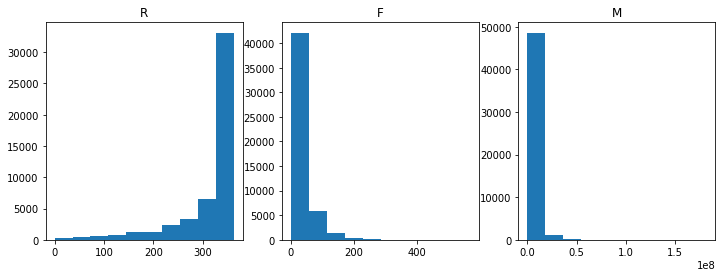

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)

axes[0].set_title('R')
axes[0].hist(RFM.R)

axes[1].set_title('F')
axes[1].hist(RFM.F)

axes[2].set_title('M')
axes[2].hist(RFM.M)

In [16]:
RFM.describe()

,R,F,M
count,49995.000000,49995.000000,4.999500e+04
mean,315.050105,32.213001,3.818974e+06
std,68.353713,36.946849,5.953794e+06
min,0.000000,1.000000,1.610000e+04
25%,306.000000,9.000000,7.629250e+05
50%,344.000000,20.000000,1.949140e+06
75%,356.000000,41.000000,4.464604e+06
max,363.000000,569.000000,1.817457e+08


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = RFM[['R', 'F', 'M']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

k_means = KMeans(n_clusters=3, random_state=0)
labels = k_means.fit_predict(X_features_scaled)
RFM['cluster'] = labels

print(silhouette_score(X_features_scaled, labels))

0.5490931961455788


In [20]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


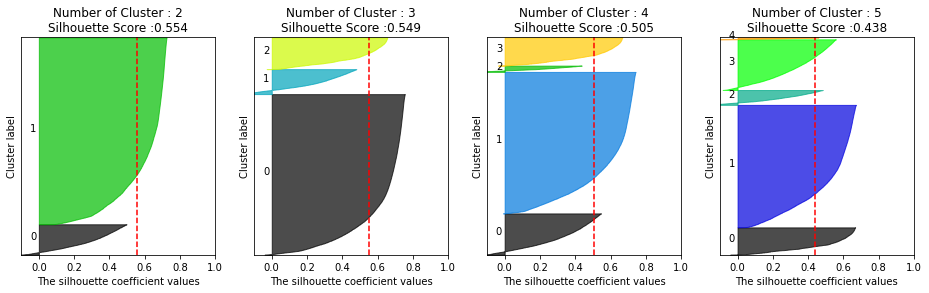

In [21]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)

0.45257755107527037


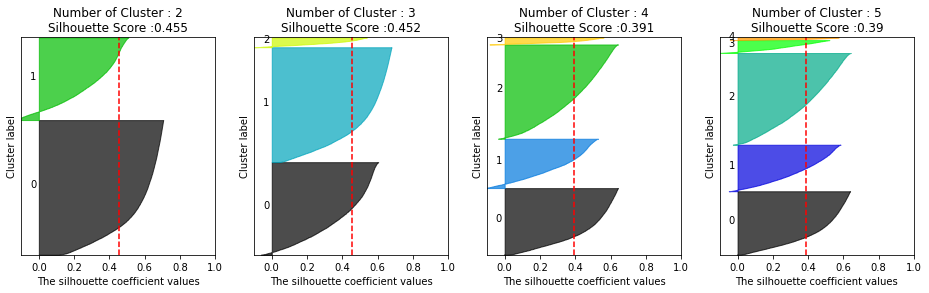

In [23]:
import numpy as np

RFM['R_log'] = np.log1p(RFM.R)
RFM['F_log'] = np.log1p(RFM.F)
RFM['M_log'] = np.log1p(RFM.M)

X_features = RFM[['R_log', 'F_log', 'M_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

k_means = KMeans(n_clusters=3)
labels = k_means.fit_predict(X_features_scaled)
RFM['cluster'] = labels

print(silhouette_score(X_features_scaled, labels))

visualize_silhouette([2, 3, 4, 5], X_features_scaled)